Found 3254 images belonging to 6 classes.
Found 3254 images belonging to 6 classes.
Found 3254 images belonging to 6 classes.
Epoch 1/10
  2/101 [..............................] - ETA: 6:38 - loss: 2.3431 - accuracy: 0.2031 

C:\Users\Ignitiv\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


101/101 [==============================] - 1260s 13s/step - loss: 1.0440 - accuracy: 0.6235 - val_loss: 0.4866 - val_accuracy: 0.8438
Epoch 2/10
101/101 [==============================] - 1263s 13s/step - loss: 0.6203 - accuracy: 0.7846 - val_loss: 0.3734 - val_accuracy: 0.8911
Epoch 3/10
101/101 [==============================] - 1292s 13s/step - loss: 0.4959 - accuracy: 0.8274 - val_loss: 0.3085 - val_accuracy: 0.9078
Epoch 4/10
101/101 [==============================] - 1254s 12s/step - loss: 0.4178 - accuracy: 0.8569 - val_loss: 0.2395 - val_accuracy: 0.9282
Epoch 5/10
101/101 [==============================] - 1264s 13s/step - loss: 0.3419 - accuracy: 0.8855 - val_loss: 0.2016 - val_accuracy: 0.9428
Epoch 6/10
101/101 [==============================] - 1227s 12s/step - loss: 0.3296 - accuracy: 0.8855 - val_loss: 0.1996 - val_accuracy: 0.9406
Epoch 7/10
101/101 [==============================] - 1224s 12s/step - loss: 0.2757 - accuracy: 0.9088 - val_loss: 0.1363 - val_accuracy: 0.9

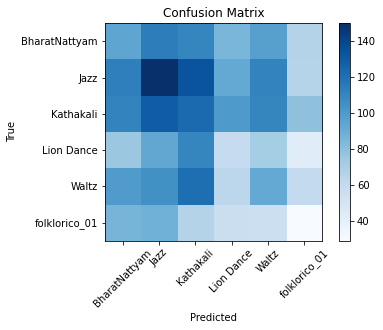

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define dataset paths
train_data_dir = 'data'
validation_data_dir = 'data'
test_data_dir = 'data'

# Image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load a pre-trained VGG16 model (without the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Create a custom top classification layer for 4 classes
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(6, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)

# Get the true labels from the test set
y_true = test_generator.classes

# Generate a classification report and confusion matrix
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_labels))
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [2]:
from tensorflow.keras.models import load_model
import os

In [3]:
model.save(os.path.join('models','imageclassifier_05.h5'))

In [5]:
model.save("imageclassifier_05.h5")

1/1 [==============================] - 0s 391ms/step
The predicted class for the new image is: Waltz


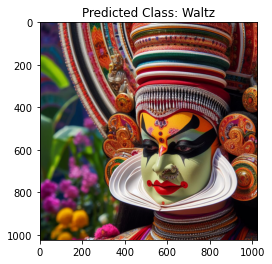

In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = load_model('imageclassifier_05.h5')

# Image dimensions
img_width, img_height = 224, 224  # Set your desired image dimensions


# Load an example image for prediction
new_image_path = os.path.join('Test','_42c96ade-9081-4b53-8117-5bfcad9de8e3.jpg')  # Change to the path of your new image
img = image.load_img(new_image_path, target_size=(img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the pixel values


# Predict the class of the new image using the loaded model
predicted_class = np.argmax(loaded_model.predict(img), axis=-1)
class_labels = ['Jazz', 'Kathakali', 'Waltz','Folklorico','BharatNattyam','Lion Dance']  # Replace with your class labels  # You can also use the class labels from your test set if they are the same
predicted_class_name = class_labels[predicted_class[0]]

print(f'The predicted class for the new image is: {predicted_class_name}')

# Visualize the new image
plt.figure()
plt.imshow(image.load_img(new_image_path))
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()